In [2]:
#matplotlob notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

fruits = pd.read_table('assets/fruit_data_with_colors.txt')
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [5]:
lookup_fruit_name=dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

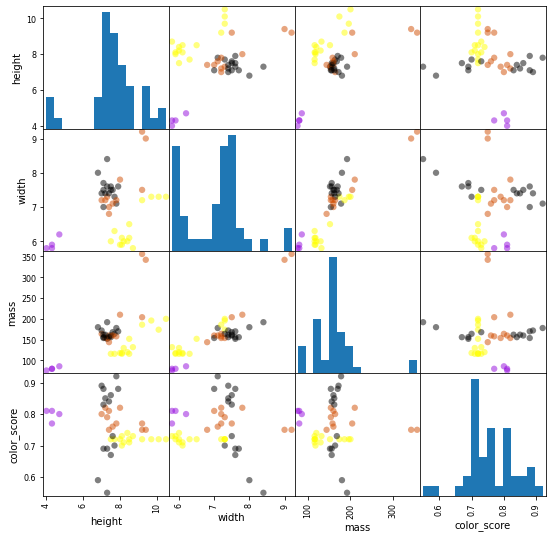

In [9]:
#plotting scatter matrix
from matplotlib import cm
X = fruits[['height','width','mass','color_score']]
Y = fruits['fruit_label']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0)
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= Y_train, marker ='o',s=40, hist_kwds={'bins':15},figsize=(9,9),cmap=cmap)

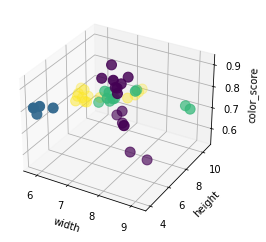

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()

ax= fig.add_subplot(111,projection='3d')
ax.scatter(X_train['width'],X_train['height'],X_train['color_score'],c=Y_train,marker='o',s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')

plt.show()


In [19]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
knn.score(X_test, y_test)

0.5333333333333333

In [23]:
fruit_prediction = knn.predict([[20,4.3,5.5]])
lookup_fruit_name[fruit_prediction[0]]

c:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [24]:
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

c:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

In [1]:
from adspy_shared_utilities  import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')

NameError: name 'X_train' is not defined

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
df=pd.read_csv('assets/mushrooms.csv')
df = pd.get_dummies(df)
df

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [7]:
df=df.sample(frac=0.08)
df.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
6345,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
918,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3861,1,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
7298,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [9]:
x= df.iloc[:,2:]
y = df.iloc[:,1]
x,y

(      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
 6345            0            0            0            0            0   
 918             0            0            1            0            0   
 3861            0            0            1            0            0   
 7298            0            0            0            1            0   
 
       cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
 6345            1              0              0              1              0   
 918             0              1              0              0              0   
 3861            0              1              0              0              0   
 7298            0              0              0              0              1   
 
       ...  population_s  population_v  population_y  habitat_d  habitat_g  \
 6345  ...             0             1             0          0          0   
 918   ...             0             0             0        

In [10]:
pca = PCA(n_components=2).fit_transform(x)
X_train,X_test,y_train,y_test = train_test_split(pca,y,random_state=0)
plt.figure(dpi=120)

<Figure size 720x480 with 0 Axes>

<Figure size 720x480 with 0 Axes>